# Machine Learning

*Лектор: Екатерина Лобачева*

*Факультет экономических наук НИУ ВШЭ, 2017-18 учебный год*

[Страница курса](http://wiki.cs.hse.ru/Машинное_обучение_(факультет_экономических_наук%29)

## Домашнее задание №1
Задание основано на материалах курса [Data analysis (Software Engineering)](http://wiki.cs.hse.ru/Data_analysis_(Software_Engineering%29) (ФКН НИУ ВШЭ).

Вам необходимо анализировать набор данных [adult.data](http://archive.ics.uci.edu/ml/datasets/Adult) (источник: UCI Machine Learning Repository) с помощью Python, pandas, numpy, scipy.

Чтобы выполнить работу, скачайте настоящий ipynb-файл, откройте его в *Jupyter Notebook*, впишите решения в оставленные для этого ячейки (при необходимости можно добавлять новые ячейки), приводя полный работающий код, а также все необходимые пояснения и ответы (для этого нужно использовать markdown-ячейки). Вы можете вставлять формулы с помощью TeX-разметки в markdown-ячейки. После выполнения работы необходимо вытащить ipynb-файл из Jupyter (например, с помощью *File → Download as… → IPython Notebook*).

**Подсказка.** Файл [adult.data](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data) является CSV-файлом, но в нём отсутствуют имена переменных — они (вместе с описаниями) приводятся в отдельном файле [adult.names](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). При загрузке датафрейма с помощью `pd.read_csv` используйте параметры `header=None` (чтобы первая строка не воспринималась как строка с именами переменных) и `names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"]`. Чтобы убрать лишние пробелы после запятых, которые есть в файле, следует добавить опцию `skipinitialspace=True`.

### Прежде всего выгрузим данные и подгрузим необходимые для работы пакеты.

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
adult_df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None, names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"], skipinitialspace=True)

In [3]:
adult_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Вопрос 1
Сколько мужчин и женщин в выборке?

In [4]:
adult_df['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

### Вопрос 2
Каков средний возраст мужчин?


In [5]:
adult_df[adult_df['sex'] == 'Male']['age'].mean()

39.43354749885268

### Вопрос 3
Какова доля граждан США?

In [6]:
len(adult_df[adult_df['native-country'] == 'United-States'])/len(adult_df)

0.895857006848684

### Вопрос 4
Нарисовать распределение уровня образования в виде столбчатой диаграммы (bar plot).

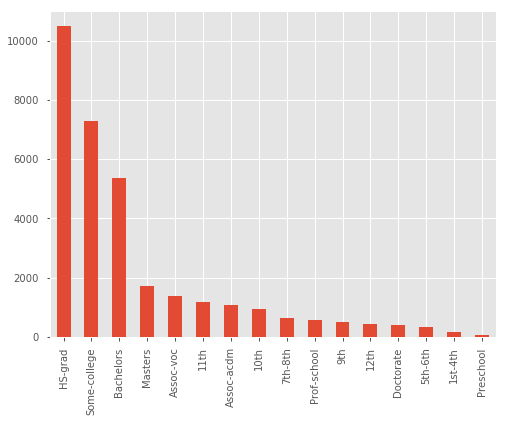

In [30]:
adult_df['education'].value_counts().plot(kind='bar', figsize=(8, 6))

### Вопрос 5
Найти среднее и стандартное отклонение переменной "final weight" (fnlwgt) для разведённых людей?

Прежде чем анализировать разведенных людей, посмотрим, какие значения принимает переменная _marital-status_.

In [88]:
adult_df['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse', 'Widowed'], dtype=object)

Очевидно, что разведенными являются люди с отметкой _Divorced_. Говоря же про остальные значения переменной, то видно, что часть из них точно говорит о том, что человек не состоит в равзводе, остальные же значения являются не совсем понятными. Поэтому разведенными будем считать только тех, у кого стоит отметка _Divorced_.

In [35]:
adult_df[adult_df['marital-status']=='Divorced']['fnlwgt'].mean()

185802.79045689848

In [36]:
adult_df[adult_df['marital-status']=='Divorced']['fnlwgt'].std()

105646.78945933603

### Вопрос 6
Правда ли, что люди, зарабатывающие более 50 тыс. в основном имеют высшее образование?

Посмотрим на образование людей с доходами, превышающими 50 тысяч:

In [58]:
adult_rich = adult_df[adult_df['50K']=='>50K']
adult_rich['education'].value_counts()

Bachelors       2221
HS-grad         1675
Some-college    1387
Masters          959
Prof-school      423
Assoc-voc        361
Doctorate        306
Assoc-acdm       265
10th              62
11th              60
7th-8th           40
12th              33
9th               27
5th-6th           16
1st-4th            6
Name: education, dtype: int64

Данная принимает разные значения, не все из которых являются до конца понятными. Поэтому будем считать, что высшее образование имеют те, у кого данная переменная принимает следующие значения:
- Bachelors 
- Some-college
- Masters
- Doctorate

Посчитаем количество людей с высокой зарплатой и высшим образованием:

In [55]:
sum_high_rich = 0
for i in ['Bachelors', 'Masters', 'Doctorate', 'Some-college']:
    sum_high_rich += len(adult_rich[adult_rich['education'] == i])

Посчитаем общее число людей с высокой зарплатой:

In [56]:
sum_rich = len(adult_df[adult_df['50K']=='>50K']['education'])

Посчитаем, какую долю занимают они от всех тех, кто получает больше 50 тысяч.

In [57]:
sum_high_rich/sum_rich

0.6214768524422906

Получается число большее 50%, поэтому можно сделать вывод, что люди, зарабатывающие больше 50 тысяч, в основном имеют высшее образование. 

### Вопрос 7
Каков максимальный возраст мужчин и женщин каждой расы?

In [62]:
adult_df.groupby(['race', 'sex'])['age'].max()

race                sex   
Amer-Indian-Eskimo  Female    80
                    Male      82
Asian-Pac-Islander  Female    75
                    Male      90
Black               Female    90
                    Male      90
Other               Female    74
                    Male      77
White               Female    90
                    Male      90
Name: age, dtype: int64

### Вопрос 8
Люди из каких стран работают как фермеры/рыбаки?

Еще посчитаем сколько фермеров-рыбаков из каждой страны:

In [66]:
adult_df[adult_df['occupation']=='Farming-fishing']['native-country'].value_counts()

United-States    879
Mexico            77
?                  5
Puerto-Rico        5
Guatemala          4
Philippines        4
Italy              2
Vietnam            2
El-Salvador        2
Canada             2
Cuba               2
England            1
Yugoslavia         1
Portugal           1
Japan              1
Germany            1
France             1
Cambodia           1
Poland             1
Ireland            1
Hong               1
Name: native-country, dtype: int64

### Вопрос 9
Рассмотрим два отношения 1) количество мужчин-бакалавров к количеству мужчин-магистров и 2) количество женщин-бакалавров к количеству женщин-магистров. Какое отношение больше?


Построим функцию, которая будет считать это отношение:

In [73]:
def education_ratio(gender):
    gender_df = adult_df[adult_df['sex'] == gender]
    sum_gender_bachelors = len(gender_df[gender_df['education'] == 'Bachelors'])
    sum_gender_masters = len(gender_df[gender_df['education'] == 'Masters'])
    return sum_gender_bachelors/sum_gender_masters

Воспользуемся построенной функцией и посчитаем данное отношение для мужчин:

In [74]:
education_ratio('Male')

3.14743049705139

Для женщин:

In [75]:
education_ratio('Female')

3.0205223880597014

__Данное отношение больше у мужчин__

### Вопрос 10
Каково максимальное количество рабочих часов в неделю? Как много людей работают столько часов в неделю? Каков их заработок?

Максимальное количество рабочих часов в неделю:

In [86]:
adult_df['hours-per-week'].max()

99

Посчитаем, сколько людей работает столько часов:

In [80]:
len(adult_df[adult_df['hours-per-week'] == 99])

85

Посмотрим, какой у них заработок:

In [94]:
print(*adult_df[adult_df['hours-per-week'] == 99]['50K'].unique(), sep = '\n')

>50K
<=50K


Получается, что люди, которые работают 99 часов в неделю получают как больше 50 тысяч, так и меньше. 